In [8]:
# Images paths for training
class_0 = ""  # 0 is the classification
class_1 = ""  # 1 is the classification

# Name of object detecting
class_0_name = ""
class_1_name = ""

# Images for testing
test_cl0_img = ""
test_cl1_img = ""


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage import io, color, transform
import matplotlib.pyplot as plt
import os

In [10]:
# Load and preprocess images
data = []

print("Labelling Class 0 images")
# Labelling images as 0
for filename in os.listdir(class_0):
    if filename.endswith(".jpg"):
        # Get the image path and save it
        image_path = os.path.join(class_0, filename)
        image = io.imread(image_path)

        # Assuming the images are not all the same size, you might want to resize them
        image = transform.resize(image, (100, 100), anti_aliasing=True)

        # Convert the image to grayscale
        image = color.rgb2gray(image)

        # Flatten the image to a 1D array
        flattened_image = image.flatten()
        data.append((flattened_image, 0))  # Assign label 0 for class 0

print("Labelling Class 1 images")
# Labelling the images as 1
for filename in os.listdir(class_1):
    if filename.endswith(".jpg"):
        # Get the image path and save it
        image_path = os.path.join(class_1, filename)
        image = io.imread(image_path)

        # Assuming the images are not all the same size, you might want to resize them
        image = transform.resize(image, (100, 100), anti_aliasing=True)

        # Convert the image to grayscale
        image = color.rgb2gray(image)

        # Flatten the image to a 1D array
        flattened_image = image.flatten()
        data.append((flattened_image, 1))  # Assign label 1 for class 1

print('Labelling Completed')

Labelling Class 0 images
Labelling Class 1 images
Labelling Completed


Displaying images


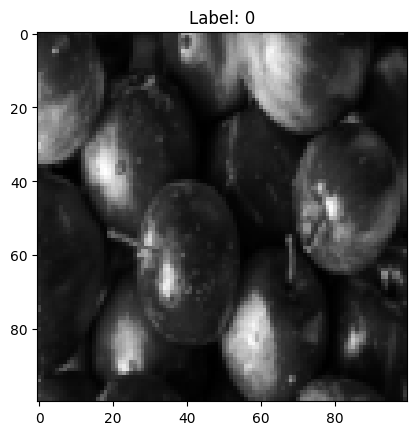

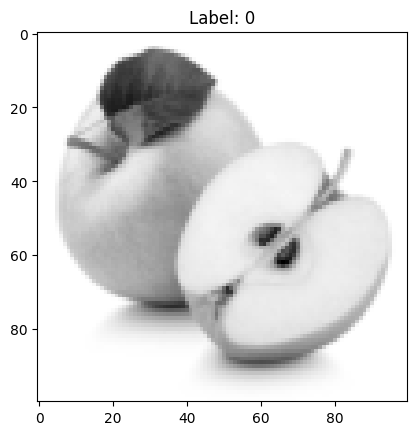

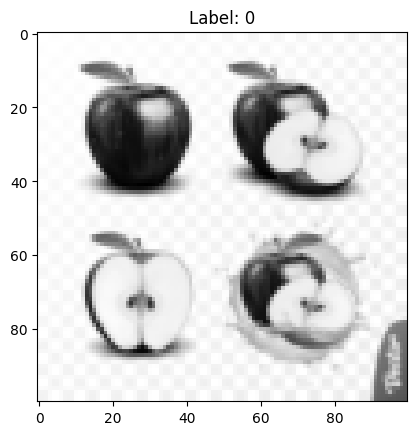

In [11]:
# Display a few images
print('Displaying images')
for item in data[:3]:  # Display the first 5 images
    image_array, label = item
    plt.imshow(image_array.reshape((100, 100)), cmap='gray')  # Reshape to original image dimensions
    plt.title(f"Label: {label}")
    plt.show()


In [12]:
# Split the data into training and testing sets
X, y = zip(*data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert X_train and X_test to 2D arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

# Define a logistic regression classifier
classifier = LogisticRegression()

# Train the model
classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Test accuracy: {accuracy}')

Test accuracy: 0.6666666666666666


c:\Users\nouri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
def image_processing(the_image):
    # Assuming the images are not all the same size, you might want to resize them
    the_image = transform.resize(the_image, (100, 100), anti_aliasing=True)

    # Convert the image to grayscale
    the_image = color.rgb2gray(the_image)

    # Flatten the image to a 1D array
    flattened_image = the_image.flatten()

    return flattened_image

def image_classification(the_image):
    # Preprocess the selected image
    preprocessed_image = image_processing(the_image)

    # Reshape the preprocessed image to a 2D array
    preprocessed_image = np.array([preprocessed_image])

    # Make predictions
    prediction = classifier.predict(preprocessed_image)

    # Display the result
    return f"Prediction: {class_0_name if prediction[0] == 0 else class_1_name}"


Prediction: apple


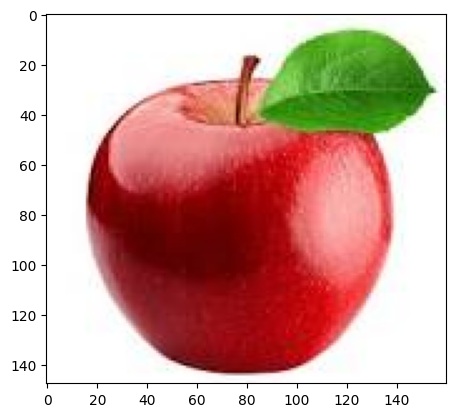



Prediction: orange


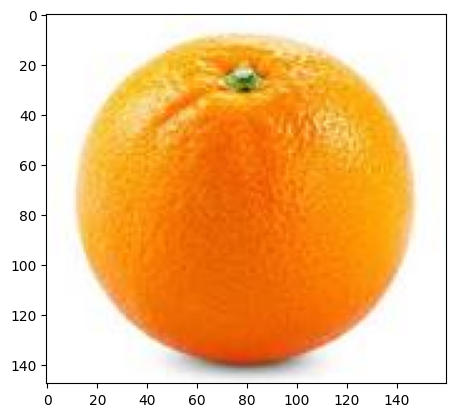

In [14]:
# Testing class 0 image
test_image = io.imread(test_cl0_img)
result = image_classification(test_image)
print(result)
plt.imshow(test_image)
plt.show()

print()
print()

# Testing class 1 image
test_image = io.imread(test_cl1_img)
result = image_classification(test_image)
print(result)
plt.imshow(test_image)
plt.show()